In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

at.set_theme("dark")

In [14]:
# download an hour of THEMIS ASI data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2022, 2, 20, 0, 55)
end_dt = datetime.datetime(2022, 2, 20, 1, 20)
site_uid = "gill"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

Read in the downloaded data

In [15]:
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

Double check you are using a proper data set if needed (below)

In [31]:
#print(data)

Scale all the images, min and max determine brightness

In [32]:
# scale all the images
#
# NOTE: you can scale all images or just one image
images_scaled = at.scale_intensity(data.data, min=10, max=75)

Generate a montage for first ten minutes

In [33]:
montage = at.montage.create(images_scaled[:, :, :, 0:10], data.timestamp[0:10]) #The 0:10 here represents the minutes you want to look at

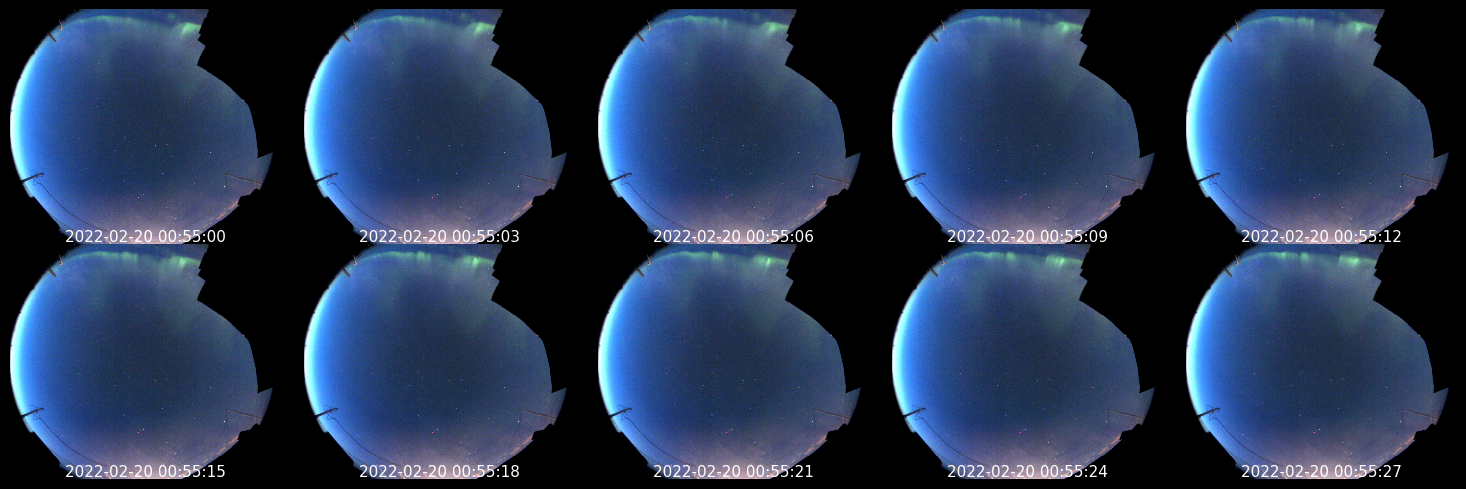

In [34]:
# plot the montage
montage.plot(2, 5, figsize=(15, 5), timestamps_fontsize=11)

Generate a montage for 1 minute of data - work on this, it is only processing the data in minutes, not seconds intervals

In [35]:
# create the montage
montage = at.montage.create(images_scaled[:, :, :, :], data.timestamp[0:720:20]) #:2 determines minute intervals of montage frames

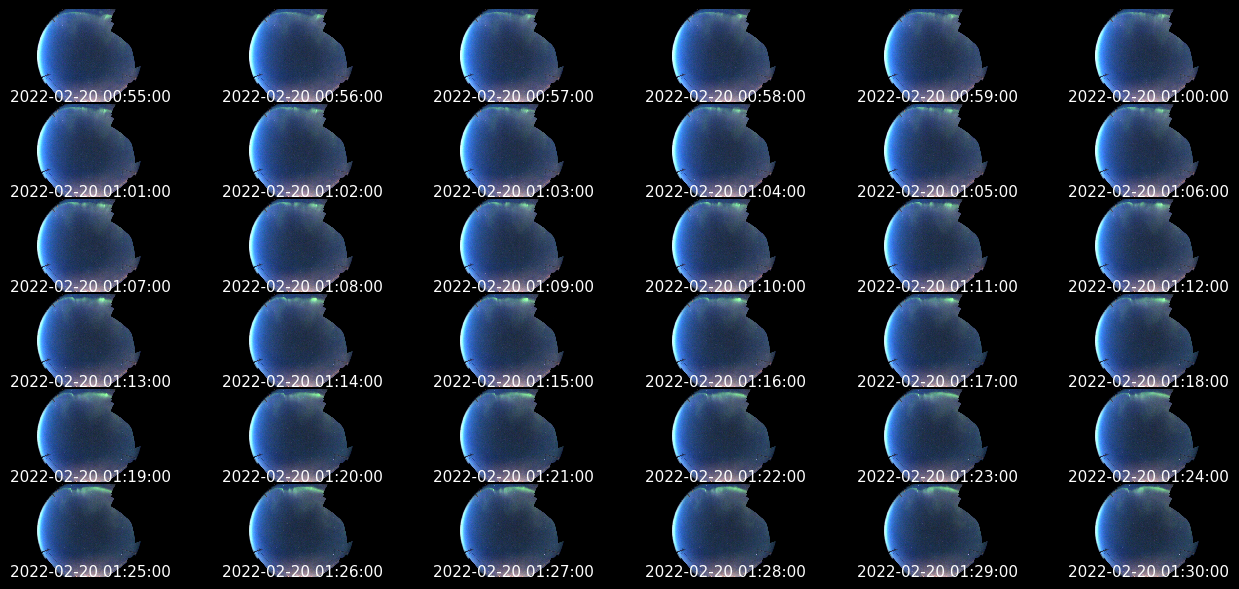

In [36]:

# plot the montage
montage.plot(6, 6, figsize=(13, 6))

Generate a montage for an hour of data

In [16]:
#this is how many frames you have, dealing with 20 frames/minute. Divide this number by 20 to see how many frames you should have (i x n) in
# your montage
len(data.timestamp)

520

In [17]:
data.data.shape

(480, 553, 3, 520)

In [20]:
# we'll use the first frame of each minute, so let's extract the appropriate data
# object with that data
import numpy as np

#first_minute_frames =np.empty((pixel width, pixel heigth, input channels (rgb=3), frames used (minutes downloaded), data type used)
#    You can command 'data.data.shape' to see what dimensions and input channels are being used
#    You can also command 'montage' to see the exact parameters used in your montage creation
first_minute_frames = np.empty((data.data.shape[0], data.data.shape[1], data.data.shape[2], 60), dtype=data.data.dtype)
first_minute_timestamps = []
counter = 0

#If you want to view each frame at seconds = 0 and seconds = 5, for example, add 'or data.timestamp[i].second == 5' to your if statement below
#Then make sure to change your timestamps_format in the montage.plot
for i in range(0, len(data.timestamp)):
    if (data.timestamp[i].second == 0):
        first_minute_frames[:,:,:,counter] = data.data[:,:,:,i]
        first_minute_timestamps.append(data.timestamp[i])
        counter += 1

# now that we have our data, let's create a montage object

#Use this if you do not need to scale (brighten, darken, change size of, etc) your images in your montage. Frames directly from ASI movies
montage = at.montage.create(first_minute_frames, first_minute_timestamps)

#Use these two if you want your images to be brighter, darker, bigger, smaller, etc than original asi movie view - FIX THIS
#images_scaled = at.scale_intensity(data.data, min=10, max=150, memory_saver = True) #min and max determine brightness
#montage = at.montage.create(images_scaled [:,:,:,:], first_minute_timestamps)

#plot the montage - if savefig is on, it will not return the image here, but download it to your jupyter folder
#      To save the figure, add savefig = True, savefig_filename = '8.30.2022.steve.montage.jpeg' to your montage.plot()
montage.plot(5,4, figsize=(12, 8), timestamps_format="%H:%M", timestamps_fontsize=10, savefig = True, savefig_filename = 'gu.feb.20.pt1.jpeg') #montage.plot(i,n, ...) where i=rows and n=cols


#Color options: Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

## A slightly faster way of a 1-hour montage - no image scaling

In [224]:
# we can leverage the first_record parameter of the read function to do the work for us
# of extracting the first minute's data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5, first_record=True)

# scale the data
images_scaled = at.scale_intensity(data.data, min=10, max=120)

# create the montage
montage = at.montage.create(data.data, data.timestamp)

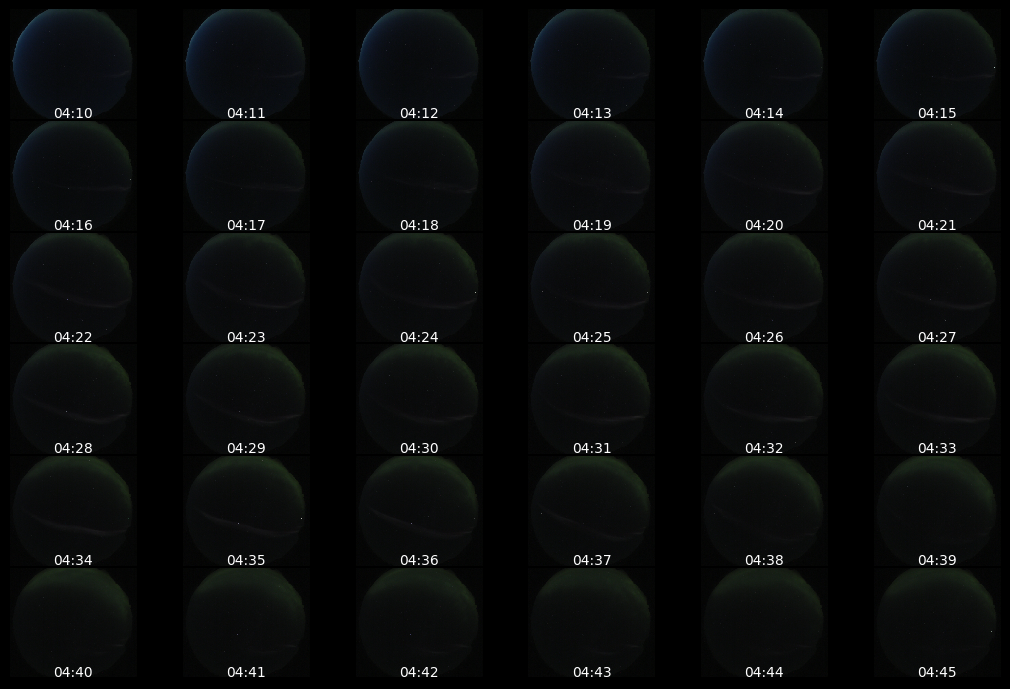

In [225]:
# plot the montage
montage.plot(6, 6, figsize=(11, 7), timestamps_format="%H:%M", timestamps_fontsize=10)